In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectKBest

# Preprocessing

In [2]:
df = pd.read_csv("train_test_small.csv")

In [3]:
train, test = train_test_split(df, test_size=0.2)
x = train.iloc[:, [0,1]+list(np.arange(3,len(df.columns)))]
y = train.iloc[:,[2]]
#transform into numbers
for col in tqdm(x.columns):
    if x[col].dtype == "object":
        le = preprocessing.LabelEncoder()
        le.fit(list(x[col]))
        x[col] = le.transform(x[col] )
        
x_test = test.iloc[:, [0,1]+list(np.arange(3,len(df.columns)))]
y_test = test.iloc[:,[2]]
#transform into numbers
for col in tqdm(x_test.columns):
    if x_test[col].dtype == "object":
        le = preprocessing.LabelEncoder()
        le.fit(list(x_test[col]))
        x_test[col] = le.transform(x_test[col] )

  0%|          | 0/25 [00:00<?, ?it/s]<ipython-input-3-b9db1e466a82>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col] = le.transform(x[col] )
  0%|          | 0/25 [00:00<?, ?it/s]<ipython-input-3-b9db1e466a82>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = le.transform(x_test[col] )
100%|██████████| 25/25 [00:00<00:00, 73.02it/s]


# Feature selection

## F scores

In [4]:
# num_to_col = dict(enumerate(x.columns))
# f_scores,p_values = f_classif(x,y)
# k = len(f_scores)
# for i in reversed(range(k)):
#     print(num_to_col[np.argsort(f_scores)[-k:][i]],np.log(np.sort(f_scores)[-k:][i]))

In [12]:
f_scores = []
verbose = False
for k_f in tqdm(range(1,15)):
    Kbest_f = SelectKBest(f_classif, k=k_f).fit(x, y)
    x_f_train = Kbest_f.transform(x)
    x_f_test = Kbest_f.transform(x_test)
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(x_f_train,y)
    y_pred_train = clf.predict(x_f_train)
    cm = confusion_matrix(y_pred_train,y.to_numpy().T[0])
    if verbose: 
        print("confusion matrix train \n",cm /np.sum(cm,axis=0))
        print("train score:",clf.score(x_f_train,y))
        print("train f-score:",f1_score(y.to_numpy().T[0],y_pred_train))
    y_pred_test = clf.predict(x_f_test)
    cm = confusion_matrix(y_pred_test,y_test.to_numpy().T[0])
    if verbose:
        print("confusion matrix test \n",cm /np.sum(cm,axis=0))
        print("test score:",clf.score(x_f_test,y_test))
    f_score_test = f1_score(y_test.to_numpy().T[0],y_pred_test)
    if verbose:
        print("test f-score:",f_score_test)
    f_scores.append(f_score_test)

/Users/Diego/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Diego/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/Diego/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/Diego/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Diego/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univar

/Users/Diego/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Diego/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/Diego/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


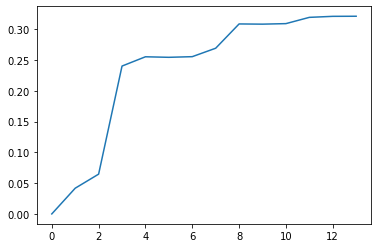

In [13]:
plt.plot(f_scores)

 ## $\chi^2$ feature selection

In [6]:
features =  list(np.arange(0,len(x.columns)))
features.remove(17);features.remove(18)
x_chi2 = x.copy()
x_chi2 = x.iloc[:,features]
#transform faren to kelvin
x_chi2.iloc[:,21] = x_chi2.iloc[:,21].transform(lambda f:273.5 + ((f - 32.0) * (5.0/9.0)))

x_chi2_test = x_test.copy()
x_chi2_test = x_chi2_test.iloc[:,features]
#transform faren to kelvin
x_chi2_test.iloc[:,21] = x_chi2_test.iloc[:,21].transform(lambda f:273.5 + ((f - 32.0) * (5.0/9.0)))

/Users/Diego/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [14]:
chi2_scores = []
verbose = False
for k_chi2 in tqdm(range(1,15)):
    Kbest_chi2 = SelectKBest(chi2, k=k_chi2).fit(x_chi2, y)
    x_chi_train = Kbest_chi2.transform(x_chi2)
    x_chi_test = Kbest_chi2.transform(x_chi2_test)
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(x_chi_train,y)
    y_pred_train = clf.predict(x_chi_train)
    cm = confusion_matrix(y_pred_train,y.to_numpy().T[0])
    if verbose:
        print("confusion matrix train \n",cm /np.sum(cm,axis=0))
        print("train score:",clf.score(x_chi_train,y))
        print("train f-score:",f1_score(y.to_numpy().T[0],y_pred_train))
    y_pred_test = clf.predict(x_chi_test)
    cm = confusion_matrix(y_pred_test,y_test.to_numpy().T[0])
    f_score_test = f1_score(y_test.to_numpy().T[0],y_pred_test)
    if verbose:
        print("confusion matrix test \n",cm /np.sum(cm,axis=0))
        print("test score:",clf.score(x_chi_test,y_test))
        print("train f-score:",f_score_test)
    chi2_scores.append(f_score_test)

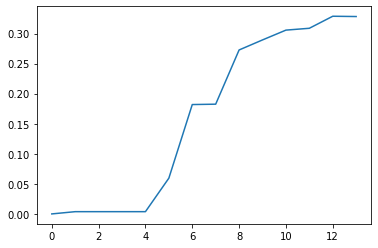

In [15]:
plt.plot(chi2_scores)

# PCA 

In [16]:
verbose = False
pca_scores = []
for k_pca in tqdm(range(1,15)):
    pca = PCA(n_components=k_pca)
    pca.fit(x)
    x_pca = pca.transform(x)
    x_pca -= np.min(x_pca,axis=0)
    x_pca /= np.max(x_pca,axis=0)
    # chi2_pca,p_values_pca = chi2(x_pca,y)
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(x_pca,y)
    y_pred_train = clf.predict(x_pca)
    cm = confusion_matrix(y_pred_train,y.to_numpy().T[0])
    if verbose:
        print("confusion matrix train \n",cm /np.sum(cm,axis=0))
        print("train score:",clf.score(x_pca,y))
        print("train f-score:",f1_score(y.to_numpy().T[0],y_pred_train))
    pca = PCA(n_components=k_pca)
    x_test_pca = pca.fit_transform(x_test)
    x_test_pca -= np.min(x_test_pca,axis=0)
    x_test_pca /= np.max(x_test_pca,axis=0)
    y_pred_test = clf.predict(x_test_pca)
    cm = confusion_matrix(y_pred_test,y_test.to_numpy().T[0])
    f_score_test = f1_score(y_test.to_numpy().T[0],y_pred_test)
    pca_scores.append(f_score_test)
    if verbose:
        print("confusion matrix test \n",cm /np.sum(cm,axis=0))
        print("test score:",clf.score(x_test_pca,y_test))
        print("train f-score:",f_score_test)

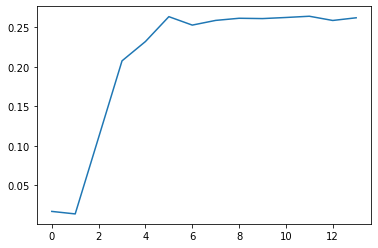

In [17]:
plt.plot(pca_scores)

# PCA and f classification

In [20]:
verbose = False
pca_f_scores = []
for k_pca in tqdm(range(1,15)):
    pca = PCA(n_components=k_pca)
    pca.fit(x)
    x_pca = pca.transform(x)
    x_pca -= np.min(x_pca,axis=0)
    x_pca /= np.max(x_pca,axis=0)
    
    x_test_pca = pca.fit_transform(x_test)
    x_test_pca -= np.min(x_test_pca,axis=0)
    x_test_pca /= np.max(x_test_pca,axis=0)
    f_scores = []
    for k_f in range(1,k_pca):
        Kbest_f = SelectKBest(f_classif, k=k_f).fit(x_pca, y)
        x_f_train = Kbest_f.transform(x_pca)
        x_f_test = Kbest_f.transform(x_test_pca)
        clf = DecisionTreeClassifier(random_state=0)
        clf.fit(x_f_train,y)
        y_pred_train = clf.predict(x_f_train)
        cm = confusion_matrix(y_pred_train,y.to_numpy().T[0])
        if verbose: 
            print("confusion matrix train \n",cm /np.sum(cm,axis=0))
            print("train score:",clf.score(x_f_train,y))
            print("train f-score:",f1_score(y.to_numpy().T[0],y_pred_train))
        y_pred_test = clf.predict(x_f_test)
        cm = confusion_matrix(y_pred_test,y_test.to_numpy().T[0])
        if verbose:
            print("confusion matrix test \n",cm /np.sum(cm,axis=0))
            print("test score:",clf.score(x_f_test,y_test))
        f_score_test = f1_score(y_test.to_numpy().T[0],y_pred_test)
        if verbose:
            print("test f-score:",f_score_test)
        f_scores.append(f_score_test)
    pca_f_scores.append(f_scores)

  0%|          | 0/14 [00:00<?, ?it/s]
0it [00:00, ?it/s]
  0%|          | 0/1 [00:00<?, ?it/s]/Users/Diego/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

  0%|          | 0/2 [00:00<?, ?it/s]/Users/Diego/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

 50%|█████     | 1/2 [00:00<00:00,  1.51it/s]/Users/Diego/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

  0%|          | 0/3 [00:00<?, ?it/s]/Us


 57%|█████▋    | 4/7 [00:06<00:04,  1.59s/it]/Users/Diego/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

 71%|███████▏  | 5/7 [00:09<00:03,  1.97s/it]/Users/Diego/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

 86%|████████▌ | 6/7 [00:12<00:02,  2.41s/it]/Users/Diego/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

  0%|          | 0/8 [00:00<?, ?it/s]/Users/Diego/anaconda3/lib/python3.8/site-pa


 60%|██████    | 6/10 [00:22<00:16,  4.04s/it]/Users/Diego/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

 70%|███████   | 7/10 [00:28<00:13,  4.54s/it]/Users/Diego/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

 80%|████████  | 8/10 [00:33<00:09,  4.92s/it]/Users/Diego/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

 90%|█████████ | 9/10 [00:40<00:05,  5.36s/it]/Users/Diego/anaconda3/lib/pytho


 92%|█████████▏| 11/12 [00:58<00:07,  7.02s/it]/Users/Diego/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

  0%|          | 0/13 [00:00<?, ?it/s]/Users/Diego/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

  8%|▊         | 1/13 [00:03<00:43,  3.62s/it]/Users/Diego/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

 15%|█▌        | 2/13 [00:06<00:37,  3.42s/it]/Users/Diego/anaconda3/lib/python3.8/si

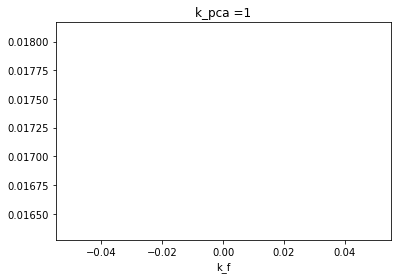

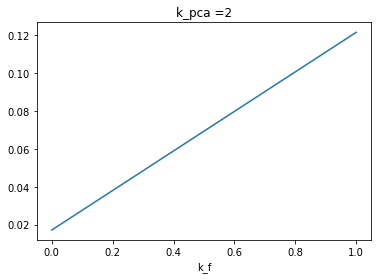

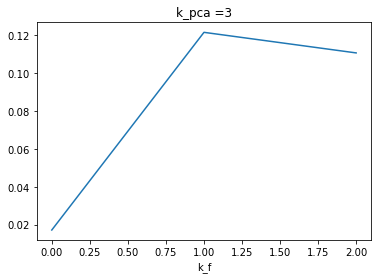

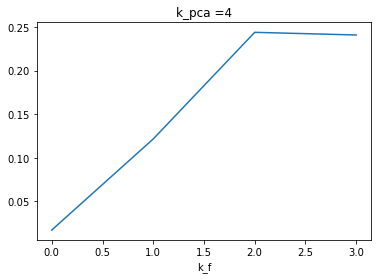

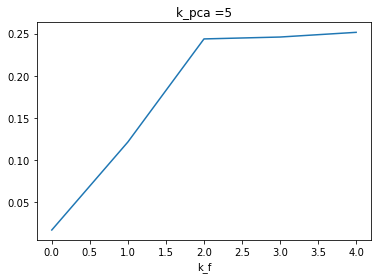

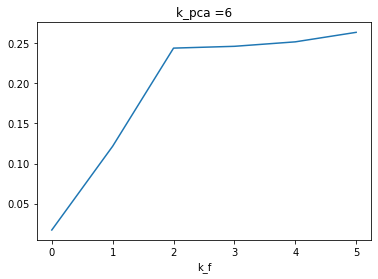

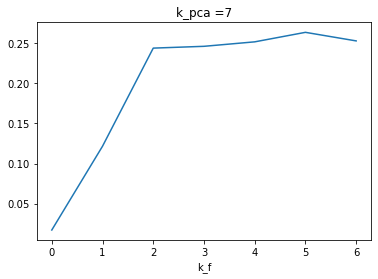

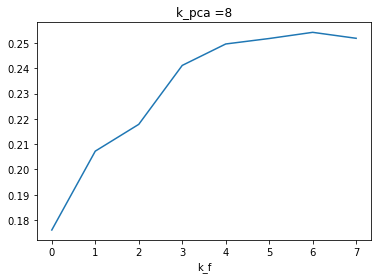

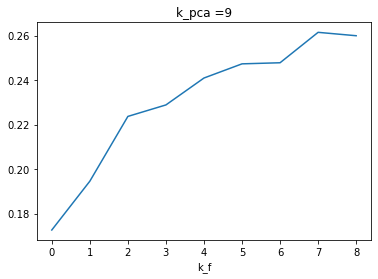

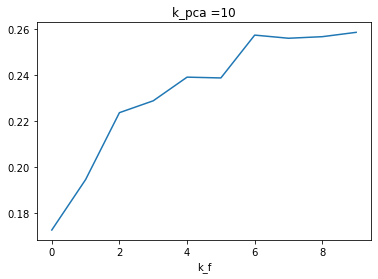

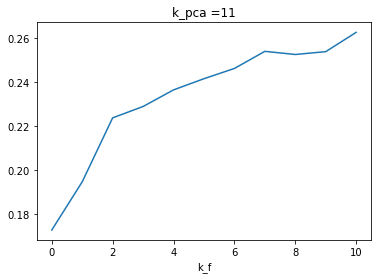

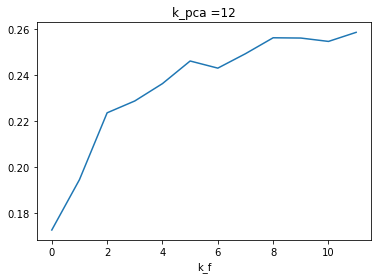

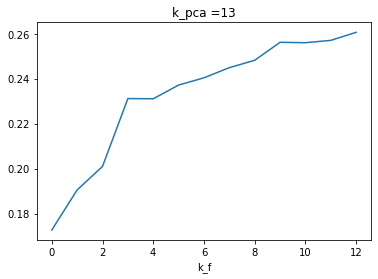

In [26]:
for i in range(1,len(pca_f_scores)):
    plt.plot(pca_f_scores[i])
    plt.title("k_pca ="+str(i))
    plt.xlabel("k_f")
    plt.show()